# Gyakori elemhalmazok előállítása



----


A gyakori elemhalmazok keresése elvileg az elemhalmazháló bejárásaként is tekinthető. A bejárás komplexitása exponenciális.

## Apriori-elv


Ha egy elemhalmaz gyakori, akkor ezen elemhalmaz összes részhalmaza is gyakori.
Az apriori-elv alkalmazásával a részhalmazok exponenciális keresési tere csökkenthető.

## Apriori algoritmus


A laborgyakorlatban az apriori algoritmus Python [implementációját](https://pypi.org/project/apyori/) próbáljuk ki.

Az Apriori algoritmus a legismertebb gyakori elemhalmaz keresésére alkalmas módszer. Szélességi bejárást valósít meg: az üres halmazból kiindulva szintenként halad előre a nagyobb méretű gyakori elemhalmazok meghatározásához. Minden iterációban az eggyel nagyobb méretű elemhalmazokkal foglalkozik, így az iterációk száma legfeljebb eggyel több, mint a legnagyobb gyakori elemhalmaz mérete.

In [1]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=09bab1baadad7a6cd8d0ded21fda0a9f376e7e1469ec2f400fc768fb2fd507d2
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [2]:
from google.colab import files
files.upload()

Saving store_data_apriori.csv to store_data_apriori.csv


{'store_data_apriori.csv': b'shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil\nburgers,meatballs,eggs\nchutney\nturkey,avocado\nmineral water,milk,energy bar,whole wheat rice,green tea\nlow fat yogurt\nwhole wheat pasta,french fries\nsoup,light cream,shallot\nfrozen vegetables,spaghetti,green tea\nfrench fries\neggs,pet food\ncookies\nturkey,burgers,mineral water,eggs,cooking oil\nspaghetti,champagne,cookies\nmineral water,salmon\nmineral water\nshrimp,chocolate,chicken,honey,oil,cooking oil,low fat yogurt\nturkey,eggs\nturkey,fresh tuna,tomatoes,spaghetti,mineral water,black tea,salmon,eggs,chicken,extra dark chocolate\nmeatballs,milk,honey,french fries,protein bar\nred wine,shrimp,pasta,pepper,eggs,chocolate,shampoo\nrice,sparkling water\nspaghetti,mineral water,ham,body spray,pancakes,green tea\nburgers,grated 

Importáljuk a könyvtárakat (az apriori az apyori-ból is).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

Olvassuk be a *store_data_apriori.csv* állományt.

In [4]:
store_data = pd.read_csv('./store_data_apriori.csv')

Hány tranzakciót tartalmaz a fájl?

In [5]:
num_transactions = store_data.shape[0]
print("A fájl {} tranzakciót tartalmaz.".format(num_transactions))

A fájl 7500 tranzakciót tartalmaz.


Melyik a leghosszabb tranzakció (hány elemű)?

In [10]:
store_data['transaction_length'] = store_data.apply(lambda row: sum(row.notnull()), axis=1)

max_length = store_data['transaction_length'].max()
longest_transaction = store_data.loc[store_data['transaction_length'] == max_length]

print("A leghosszabb tranzakció {} elemű.".format(max_length))
print("Elemek: {}".format(list(longest_transaction.values[0][:-1])))

A leghosszabb tranzakció 20 elemű.
Elemek: ['fresh tuna', 'frozen vegetables', 'parmesan cheese', 'pepper', 'spaghetti', 'milk', 'olive oil', 'black tea', 'almonds', 'salmon', 'honey', 'cake', 'gums', 'oil', 'cereals', 'chocolate', 'frozen smoothie', 'protein bar', 'mayonnaise', nan]


Mi az átlag tranzakció hossza (általában hány terméket vásárolnak)?

In [14]:
store_data = pd.read_csv('store_data_apriori.csv', header=None)

num_transactions = len(store_data)

total_items_count = store_data.notnull().sum().sum()

avg_transaction_length = total_items_count / num_transactions

print("Az átlagos tranzakcióhossz {:.2f}.".format(avg_transaction_length))

Az átlagos tranzakcióhossz 3.91.


Hány különböző termék került eladásra?

In [15]:
# Egyedi termékek kiválogatása
unique_items = store_data.stack().unique()

# Az egyedi termékek számának meghatározása
num_unique_items = len(unique_items)

print("Az eladott különböző termékek száma: {}.".format(num_unique_items))

Az eladott különböző termékek száma: 119.


Melyik terméket hányszor adták el?

In [16]:
item_counts = store_data.stack().value_counts()

print("Termék eladások:")
print(item_counts)

Termék eladások:
mineral water    1788
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1230
                 ... 
tea                29
bramble            14
cream               7
napkins             5
water spray         3
Length: 119, dtype: int64


Átlagban egy terméket hányszor adtak el?

In [17]:

item_counts = store_data.stack().value_counts()

avg_sales_per_item = item_counts.mean()

print("Átlagos eladások száma egy termékre: {:.2f}.".format(avg_sales_per_item))

Átlagos eladások száma egy termékre: 246.75.


Ábrázoljuk a termékeladások eloszlását (hisztogram).

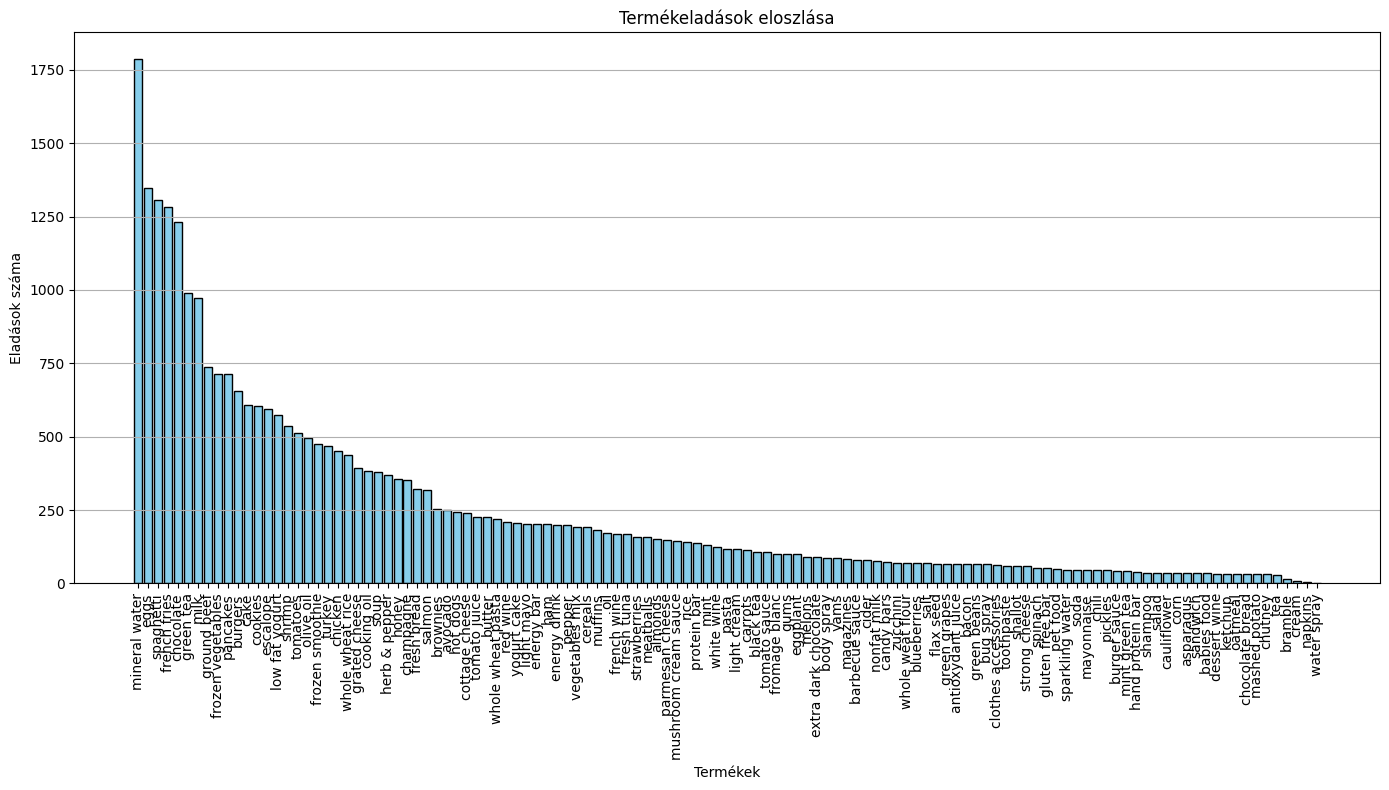

In [24]:
item_counts = store_data.stack().value_counts()

plt.figure(figsize=(14, 8))
plt.bar(item_counts.index, item_counts.values, color='skyblue', edgecolor='black')
plt.title('Termékeladások eloszlása')
plt.xlabel('Termékek')
plt.ylabel('Eladások száma')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Az  apriori algoritmus bemenete egy  listákat tartalamazó lista. Alakítsuk át a dataframet "list of lists"-re.

In [21]:
records = store_data.values.tolist()

In [22]:
print(records)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['chutney', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['turkey', 'avocado', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['low fat yogurt', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['whole wheat pasta', 'french fries', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

Válasszuk meg a `min_support`, `min_confidence`, `min_lift` paramétereket az Apriori algoritmusnak és számoljuk ki a gyakori elemhalmazokat.

In [30]:
from mlxtend.frequent_patterns import apriori

# Gyakori elemhalmazok kiszámítása az Apriori algoritmussal
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Kiírjuk az eredményeket
print("Gyakori elemhalmazok:")
print(frequent_itemsets)





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'df' is not defined

Hozzunk létre egy saját `min_length` paramétert is, és szűrjük ki azokat az elemhalmazokat, amelyek nem felelnek meg ennek a minimális hosszuságnak. A kimenetben szereplő elemhalmazok legalább `min_length` hosszúnak kell lenniük.

Hogyan változik az elemhalmazok száma a `min_support`, `min_confidence`, `min_lift`, illetve a saját `min_length` paraméterek változtatásával (írásbeli magyarázat, nem kód)?